In [11]:
import json
items = []
file_path = "/media/ssd/cdp/MLLM-Judge/Dataset/Benchmark/score.jsonl"
with open(file_path, "r") as f:
    for line in f.readlines():
        items.append(json.loads(line))


In [13]:
human_answers = {}
for item in items:
    # 初始化每个item的human_answers
    human_answers[int(item['score_id'])] = item['human']


In [23]:
import json
# 数据集定义
dataset = {
    (0, 300): "coco", (300, 600): "Concept Caption", (600, 900): "diffusiondb", 
    (900, 1200): "infographicsVQA", (1200, 1800): "mathvista", (1800, 2100): "textVQA", 
    (2100, 2400): "WIT", (2400, 2700): "ChartQA", (2700, 3000): "VisitBench", 
    (3000, 3300): "LLaVA"
}
cogvlm = []
with open("/media/ssd/cdp/MLLM-Judge/Dataset/step3/Score/GPT-4V.jsonl",'r') as f:
    for line in f.readlines():
        cogvlm.append(json.loads(line))
from scipy.stats import pearsonr
# 初始化数据结构，为每个数据集创建存储结构
dataset_annos = {name: {'human_annos': [], 'cogvlm_anns': []} for _, name in dataset.items()}

cogvlm_result = []
# 对每个条目按数据集分别统计评分
for item in cogvlm:
    item_id = item['score_id']
    dataset_name = None

    # 确定item属于哪个数据集
    for (start, end), name in dataset.items():
        if start <= item_id < end:
            dataset_name = name
            break

    if dataset_name is None or int(item['score_id']) not in list(human_answers.keys()) or int(item['result']['judge']) == -1:
        continue

    # 添加数据到对应数据集
    dataset_annos[dataset_name]['human_annos'].append(int(human_answers[int(item['score_id'])]))
    dataset_annos[dataset_name]['cogvlm_anns'].append(int(item['result']['judge']))

sum = 0
# 计算并打印每个数据集的皮尔逊相关系数
for dataset_name, annos in dataset_annos.items():
    # if dataset_name in ['diffusiondb', 'mathvista', 'ChartQA', 'infographicsVQA']:   
    #     continue
    if annos['human_annos'] and annos['cogvlm_anns']:
        # print(len(annos['human_annos']))
        correlation, p_value = pearsonr(annos['human_annos'], annos['cogvlm_anns'])
        
        sum += correlation

        print(f"{dataset_name} Pearson Correlation: {correlation:}, P-Value: {p_value:}")
    else:
        print(f"{dataset_name} Pearson Correlation: No data")
print(sum/10)


coco Pearson Correlation: 0.14358062827140478, P-Value: 0.041492468058229086
Concept Caption Pearson Correlation: 0.011380631170109644, P-Value: 0.8651956249481567
diffusiondb Pearson Correlation: -0.03818413675843768, P-Value: 0.5344462025766203
infographicsVQA Pearson Correlation: 0.07775026138589607, P-Value: 0.27381460943042457
mathvista Pearson Correlation: 0.1140000971610096, P-Value: 0.07550359827107767
textVQA Pearson Correlation: 0.06924642931018701, P-Value: 0.4621225081947503
WIT Pearson Correlation: 0.2411000259410959, P-Value: 0.0011125758873219318
ChartQA Pearson Correlation: 0.19532874240243933, P-Value: 0.0008786868495036881
VisitBench Pearson Correlation: -0.07051625834789992, P-Value: 0.23369650174685772
LLaVA Pearson Correlation: 0.1529185313660904, P-Value: 0.010673601814392487
0.08966049519018952


In [9]:
for i in cogvlm_result:
    if i > 5:
        print(i)

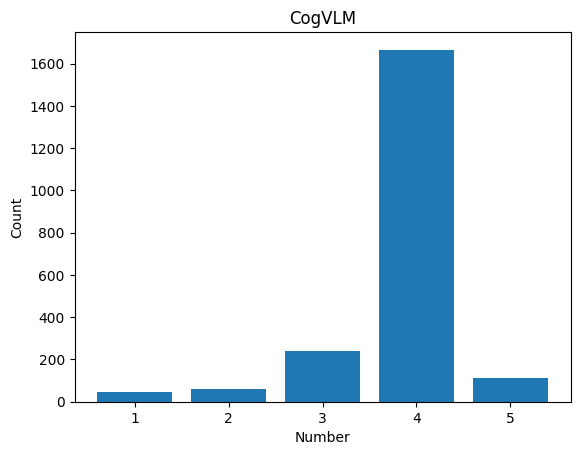

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(cogvlm_result)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 6)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('CogVLM')
plt.show()


In [11]:
import json
# 数据集定义
dataset = {
    (0, 300): "coco", (300, 600): "Concept Caption", (600, 900): "diffusiondb", 
    (900, 1200): "infographicsVQA", (1200, 1800): "mathvista", (1800, 2100): "textVQA", 
    (2100, 2400): "WIT", (2400, 2700): "ChartQA", (2700, 3000): "VisitBench", 
    (3000, 3300): "LLaVA"
}
cogvlm = []
with open("/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/step3/score evaluating data/llava_score_clean.jsonl",'r') as f:
    for line in f.readlines():
        cogvlm.append(json.loads(line))
from scipy.stats import pearsonr

# 初始化数据结构，为每个数据集创建存储结构
dataset_annos = {name: {'human_annos': [], 'cogvlm_anns': []} for _, name in dataset.items()}

llava_result = []
# 对每个条目按数据集分别统计评分
for item in cogvlm:
    llava_result.append(int(item['result']['judge'][0]))
    item_id = item['id']
    dataset_name = None

    # 确定item属于哪个数据集
    for (start, end), name in dataset.items():
        if start <= item_id < end:
            dataset_name = name
            break

    if dataset_name is None or int(item['id']) not in human_answers.keys() or human_answers[int(item['id'])][item['name']] is None or int(item['result']['judge']) == -1:
        continue

    # 添加数据到对应数据集
    dataset_annos[dataset_name]['human_annos'].append(human_answers[int(item['id'])][item['name']])
    dataset_annos[dataset_name]['cogvlm_anns'].append(int(item['result']['judge']))

sum = 0
# 计算并打印每个数据集的皮尔逊相关系数
for dataset_name, annos in dataset_annos.items():
    if annos['human_annos'] and annos['cogvlm_anns']:
        # print(len(annos['human_annos']))
        correlation, p_value = pearsonr(annos['human_annos'], annos['cogvlm_anns'])
        sum += correlation
        print(f"{dataset_name} Pearson Correlation: {correlation:}, P-Value: {p_value:}")
    else:
        print(f"{dataset_name} Pearson Correlation: No data")
print(sum/10)


coco Pearson Correlation: 0.2470487371272214, P-Value: 5.650685714709369e-05
Concept Caption Pearson Correlation: 0.22702541346019756, P-Value: 0.00039246098514174993
diffusiondb Pearson Correlation: 0.060223029206493195, P-Value: 0.30759529112577666
infographicsVQA Pearson Correlation: 0.24228231848840026, P-Value: 0.0003708324955900986
mathvista Pearson Correlation: 0.09280570707292836, P-Value: 0.061405394124369767
textVQA Pearson Correlation: 0.24559537628019285, P-Value: 9.301559175600744e-05
WIT Pearson Correlation: 0.1089582591949556, P-Value: 0.07071244999582614
ChartQA Pearson Correlation: 0.26281294498589125, P-Value: 9.265092095700525e-05
VisitBench Pearson Correlation: 0.19792050659149055, P-Value: 0.0045450565432601855
LLaVA Pearson Correlation: 0.07113446002824737, P-Value: 0.289130879240252
0.17558067524360182


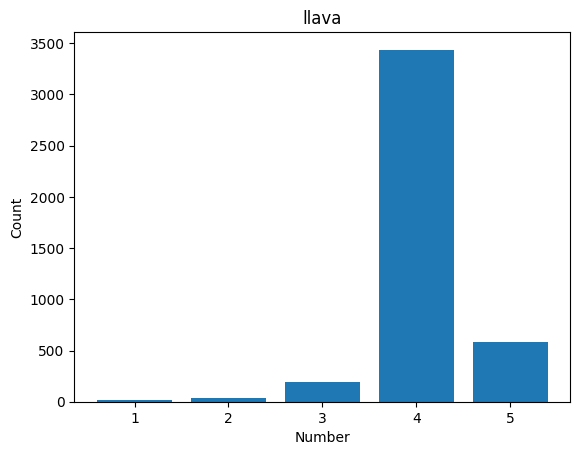

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(llava_result)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 6)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('llava')
plt.show()


In [13]:
from scipy.stats import pearsonr
import json
import numpy as np

# 数据集定义
dataset = {
    (0, 300): "coco", (300, 600): "Concept Caption", (600, 900): "diffusiondb", 
    (900, 1200): "infographicsVQA", (1200, 1800): "mathvista", (1800, 2100): "textVQA", 
    (2100, 2400): "WIT", (2400, 2700): "ChartQA", (2700, 3000): "VisitBench", 
    (3000, 3300): "LLaVA"
}

# 初始化数据结构
items = []
human_judge_scores_by_dataset = {name: {'human_answers': [], 'judge_scores': []} for _, name in dataset.items()}

# 读取文件
with open('/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/human labeling and agreement/score_setting_0201.jsonl', 'r') as f:
    for line in f:
        items.append(json.loads(line))
# 处理数据
for item in items:
    item_id = item['id']
    dataset_name = None
    # 确定item属于哪个数据集
    for (start, end), name in dataset.items():
        if start <= int(item_id) < end:
            dataset_name = name
            break
    
    if dataset_name is None:
        continue
    # 处理每个response
    for response_key in ['response1', 'response2', 'response3', 'response4']:
        if response_key not in item.keys():
            continue    
        response = item[response_key]

        # 处理Evaluator1和Evaluator2
        for evaluator_key in ['Evaluator1']:
            evaluator = response[evaluator_key]

            # 确保所有所需字段都存在
            if evaluator['judge_Evaluator'] != -1:
                human_judge_scores_by_dataset[dataset_name]['human_answers'].append(response['Human_answer'])
                if int(evaluator['judge_Evaluator']) > 5:
                    print(evaluator['judge_Evaluator'])
                    new_evaluate_score = int(str(evaluator['judge_Evaluator'])[-1])
                    human_judge_scores_by_dataset[dataset_name]['judge_scores'].append(new_evaluate_score)
                else:
                    human_judge_scores_by_dataset[dataset_name]['judge_scores'].append(evaluator['judge_Evaluator'])

sum = 0
# 计算并打印每个数据集的皮尔逊相关系数
for dataset_name, scores in human_judge_scores_by_dataset.items():
    # if dataset_name == 'diffusiondb':
    #     continue
    human_answers = scores['human_answers']
    judge_scores = scores['judge_scores']
    
    if len(human_answers) > 0 and len(judge_scores) > 0:
        correlation, p = pearsonr(human_answers, judge_scores)
        sum+=correlation
        print(f"{dataset_name} Pearson Correlation: {correlation:.3f}, p-value: {p}")
    else:
        print(f"{dataset_name} Pearson Correlation: No data")
sum/9

coco Pearson Correlation: 0.262, p-value: 1.9985412295974135e-05
Concept Caption Pearson Correlation: 0.408, p-value: 5.441610156808743e-11
diffusiondb Pearson Correlation: No data
infographicsVQA Pearson Correlation: 0.400, p-value: 2.428416454519326e-09
mathvista Pearson Correlation: 0.228, p-value: 4.510448846029816e-06
textVQA Pearson Correlation: 0.222, p-value: 0.0004433465957344852
WIT Pearson Correlation: 0.418, p-value: 8.418019225014634e-13
ChartQA Pearson Correlation: 0.343, p-value: 3.578297500162863e-07
VisitBench Pearson Correlation: 0.336, p-value: 8.824248594402523e-07
LLaVA Pearson Correlation: 0.374, p-value: 9.823610110276249e-09


0.3322646101822253

In [14]:
import json
# 数据集定义
dataset = {
    (0, 300): "coco", (300, 600): "Concept Caption", (600, 900): "diffusiondb", 
    (900, 1200): "infographicsVQA", (1200, 1800): "mathvista", (1800, 2100): "textVQA", 
    (2100, 2400): "WIT", (2400, 2700): "ChartQA", (2700, 3000): "VisitBench", 
    (3000, 3300): "LLaVA"
}
cogvlm = []
with open("/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/step3/score evaluating data/llava_score_clean.jsonl",'r') as f:
    for line in f.readlines():
        cogvlm.append(json.loads(line))
from scipy.stats import pearsonr

# 初始化数据结构，为每个数据集创建存储结构
dataset_annos = {name: {'human_annos': [], 'cogvlm_anns': []} for _, name in dataset.items()}

# 对每个条目按数据集分别统计评分
for item in cogvlm:
    item_id = item['id']
    dataset_name = None

    # 确定item属于哪个数据集
    for (start, end), name in dataset.items():
        if start <= item_id < end:
            dataset_name = name
            break

    if dataset_name is None or int(item['id']) not in human_answers.keys() or human_answers[int(item['id'])][item['name']] is None or int(item['result']['judge']) == -1:
        continue

    # 添加数据到对应数据集
    dataset_annos[dataset_name]['human_annos'].append(human_answers[str(item['id'])][item['name']])
    dataset_annos[dataset_name]['cogvlm_anns'].append(int(item['result']['judge']))

# 计算并打印每个数据集的皮尔逊相关系数
for dataset_name, annos in dataset_annos.items():
    if annos['human_annos'] and annos['cogvlm_anns']:
        correlation, p_value = pearsonr(annos['human_annos'], annos['cogvlm_anns'])
        print(f"{dataset_name} Pearson Correlation: {correlation:.2f}, P-Value: {p_value:.3f}")
    else:
        print(f"{dataset_name} Pearson Correlation: No data")


AttributeError: 'list' object has no attribute 'keys'

In [15]:
import json

# 数据集定义
dataset = {
    (0, 300): "coco", (300, 600): "Concept Caption", (600, 900): "diffusiondb", 
    (900, 1200): "infographicsVQA", (1200, 1800): "mathvista", (1800, 2100): "textVQA", 
    (2100, 2400): "WIT", (2400, 2700): "ChartQA", (2700, 3000): "VisitBench", 
    (3000, 3300): "LLaVA"
}

# 初始化数据结构
items = []
human_agreement_by_dataset = {name: {'agree': 0, 'total': 0} for _, name in dataset.items()}

# 读取文件
with open('/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/human labeling and agreement/score_setting_0201.jsonl', 'r') as f:
    for line in f:
        items.append(json.loads(line))
gpt_win = 0
gemini_win = 0
tie = 0
# 处理数据
for item in items:
    item_id = item['id']
    dataset_name = None

    # 确定item属于哪个数据集
    for (start, end), name in dataset.items():
        if start <= int(item_id) < end:
            dataset_name = name
            break

    if dataset_name is None:
        continue

    # 处理每个response
    for response_key in ['response1', 'response2', 'response3', 'response4']:
        if response_key not in item.keys():
            continue  
        response = item[response_key]

        # 处理Evaluator1和Evaluator2
        for evaluator_key in ['Evaluator1']:
            evaluator = response[evaluator_key]

            # 累计human_agreement
            if evaluator['judge_human'] == 1 :
                human_agreement_by_dataset[dataset_name]['agree'] += 1
            if evaluator['judge_human'] != -1:
                human_agreement_by_dataset[dataset_name]['total'] += 1
sum = 0
# 计算并打印每个数据集的human agreement
for dataset_name, agreement_data in human_agreement_by_dataset.items():
    if agreement_data['total'] > 0:
        agreement_percentage = agreement_data['agree'] / agreement_data['total']
        sum += agreement_percentage
        print(f"{dataset_name} Human Agreement: {agreement_percentage}")
    else:
        print(f"{dataset_name} Human Agreement: No data")
sum/9

coco Human Agreement: 0.7829457364341085
Concept Caption Human Agreement: 0.7394957983193278
diffusiondb Human Agreement: No data
infographicsVQA Human Agreement: 0.6183574879227053
mathvista Human Agreement: 0.5355329949238579
textVQA Human Agreement: 0.6209677419354839
WIT Human Agreement: 0.7490774907749077
ChartQA Human Agreement: 0.6303317535545023
VisitBench Human Agreement: 0.7128712871287128
LLaVA Human Agreement: 0.7027027027027027


0.6769203326329233

In [16]:
from scipy.stats import pearsonr

def calculate_pearson_correlation(list1, list2):
    """
    计算两个列表的皮尔逊相关系数

    :param list1: 第一个列表
    :param list2: 第二个列表
    :return: 皮尔逊相关系数
    """
    if len(list1) != len(list2):
        return "两个列表的长度必须相同"

    correlation, _ = pearsonr(list1, list2)
    return correlation


correlation = calculate_pearson_correlation(Human_answer1, judge1)
print("皮尔逊相关系数:", correlation)
correlation = calculate_pearson_correlation(Human_answer2, judge2)
print("皮尔逊相关系数:", correlation)

皮尔逊相关系数: 0.27517920375304694
皮尔逊相关系数: 0.5891596670266338


In [17]:
judge1_human_agreement/len(judge1)

0.6694915254237288

In [18]:
judge2_human_agreement/len(judge2)

0.6908809891808346

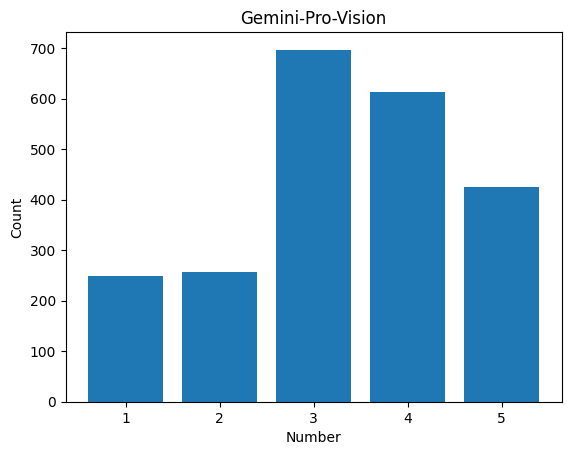

In [19]:
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(judge1_analyze)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 6)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)

plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Gemini-Pro-Vision')
plt.show()


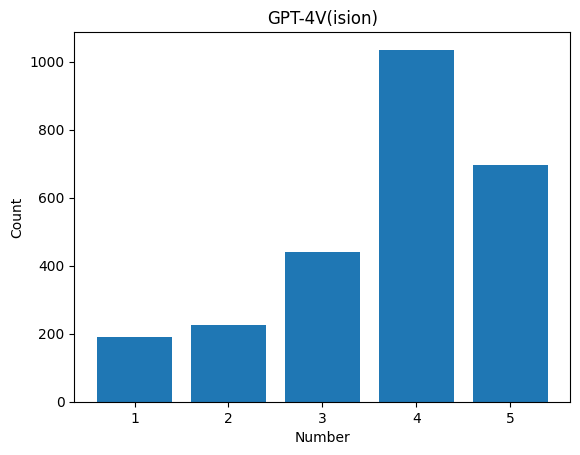

In [20]:
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(judge2_analyze)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 6)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('GPT-4V(ision)')
plt.show()


In [21]:
print(judge1_win/(judge1_win + judge2_win + tie))
print(judge2_win/(judge1_win + judge2_win + tie))
print(tie/(judge1_win + judge2_win + tie))

0.31273408239700373
0.6872659176029963
0.0


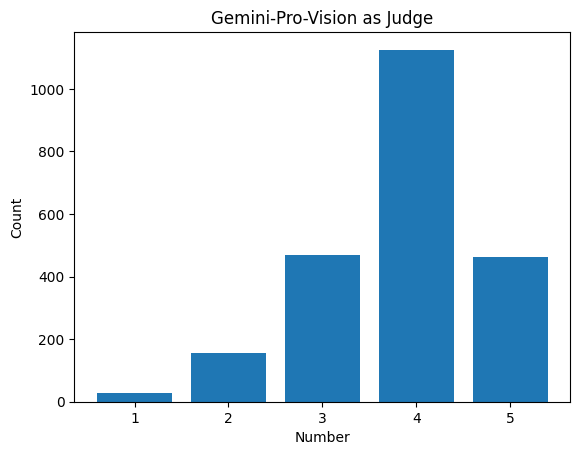

In [22]:
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(judge1)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 6)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Gemini-Pro-Vision as Judge')
plt.show()


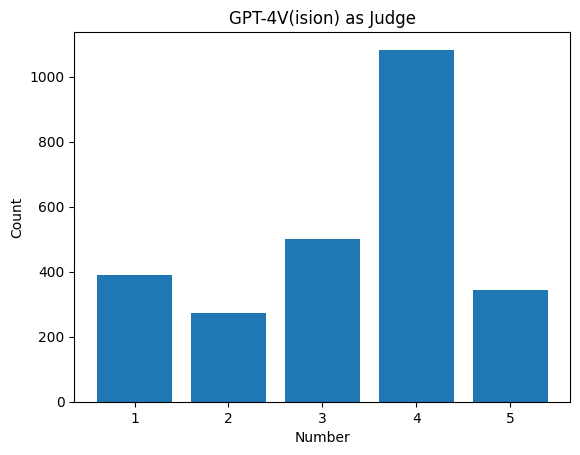

In [23]:
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(judge2)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 6)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('GPT-4V(ision) as Judge')
plt.show()


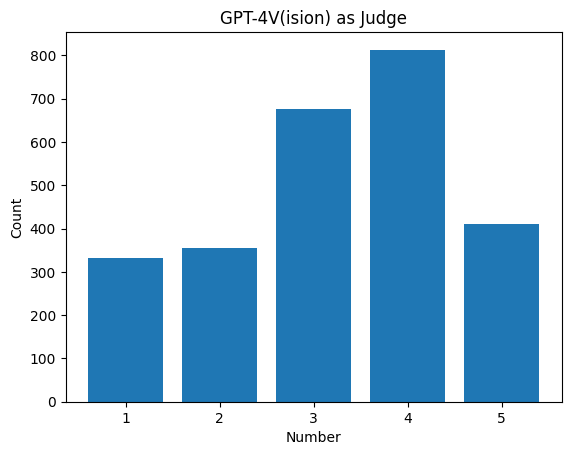

In [24]:
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(Human_answer2)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 6)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('GPT-4V(ision) as Judge')
plt.show()


/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


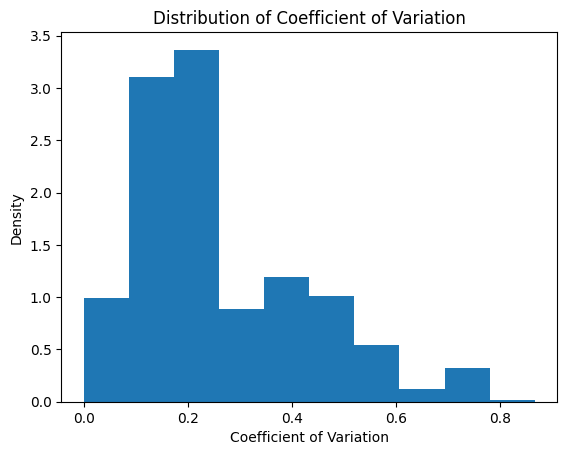

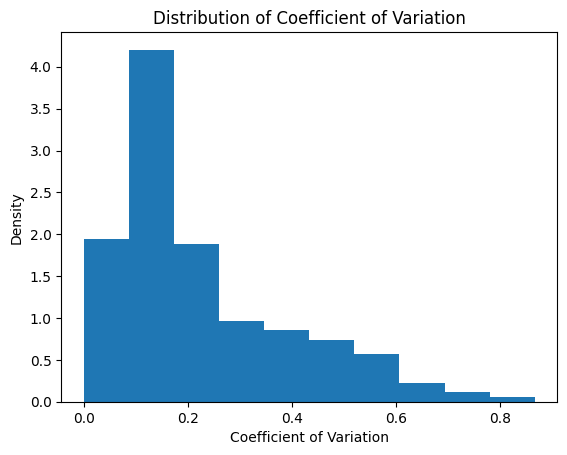

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_coefficient_of_variation(two_dim_array):
    """
    对二维数组中的每个子列表计算变异系数

    :param two_dim_array: 二维数组
    :return: 含有每个子列表变异系数的列表
    """
    cvs = []
    for sub_list in two_dim_array:
        if np.mean(sub_list) != 0:
            cv = np.std(sub_list) / np.mean(sub_list)
            cvs.append(cv)
        else:
            cvs.append(0)  # 对于平均值为0的列表，变异系数为0
    return cvs

def plot_histogram(cvs):
    """
    使用直方图可视化变异系数的分布

    :param cvs: 变异系数列表
    """
    plt.hist(cvs, bins=10, density=True)  # bins参数控制直方图的条形数量
    plt.title("Distribution of Coefficient of Variation")
    plt.xlabel("Coefficient of Variation")
    plt.ylabel("Density")
    plt.show()

cvs = calculate_coefficient_of_variation(judge1_list)
plot_histogram(cvs)
cvs = calculate_coefficient_of_variation(judge2_list)
plot_histogram(cvs)


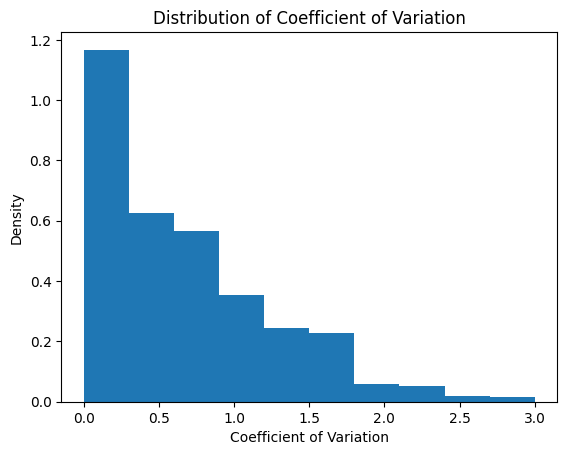

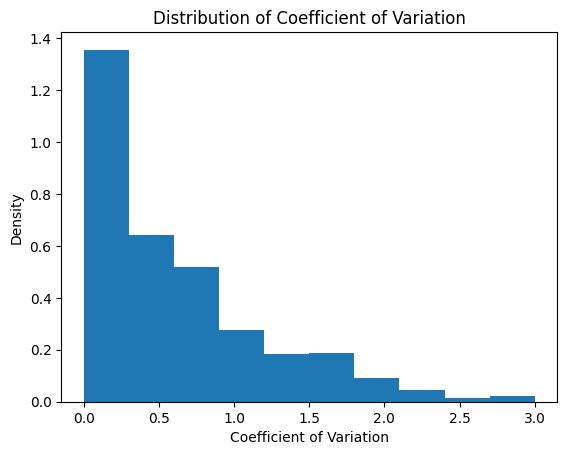

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mean_absolute_deviation(two_dim_array):
    """
    对二维数组中的每个子列表计算平均绝对偏差

    :param two_dim_array: 二维数组
    :return: 含有每个子列表平均绝对偏差的列表
    """
    deviations = []
    for sub_list in two_dim_array:
        mean = np.mean(sub_list)
        deviations.extend([abs(x - mean) for x in sub_list])
    return deviations

def plot_histogram(cvs):
    """
    使用直方图可视化变异系数的分布

    :param cvs: 变异系数列表
    """
    plt.hist(cvs, bins=10, density=True)  # bins参数控制直方图的条形数量
    plt.title("Distribution of Coefficient of Variation")
    plt.xlabel("Coefficient of Variation")
    plt.ylabel("Density")
    plt.show()


deviations = calculate_mean_absolute_deviation(judge1_list)
plot_histogram(deviations)
deviations = calculate_mean_absolute_deviation(judge2_list)
plot_histogram(deviations)

In [27]:
new_judge_list1 = []
for item in judge1_list:
    if len(item) == 0:
        continue
    else:
        new_judge_list1.append(item)

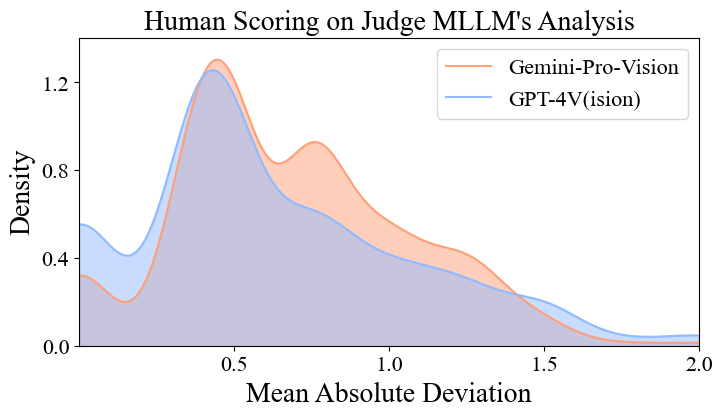

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib import font_manager
font_manager.fontManager.addfont('/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/scripts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'

def calculate_mean_absolute_deviation(two_dim_array):
    """
    对二维数组中的每个子列表计算平均绝对偏差

    :param two_dim_array: 二维数组
    :return: 含有每个子列表平均绝对偏差的列表
    """
    deviations = []
    for sub_list in two_dim_array:
        mean = np.mean(sub_list)
        deviations.append(np.mean([abs(x - mean) for x in sub_list]))
    return deviations

def plot_smoothed_line_chart(deviations1, deviations2):
    """
    使用平滑的折线图可视化两组数据

    :param deviations1: 第一组数据的平均绝对偏差列表
    :param deviations2: 第二组数据的平均绝对偏差列表
    """
    # 计算高斯核密度估计
    kde1 = gaussian_kde(deviations1)
    kde2 = gaussian_kde(deviations2)

    # 创建数据点以绘图
    x1 = np.linspace(min(deviations1), max(deviations1), 500)
    x2 = np.linspace(min(deviations2), max(deviations2), 500)

    plt.figure(figsize=(8, 4))

    # 绘制两个数据集的平滑线图
    plt.fill_between(x1, kde1(x1), color='#FFA07A', alpha=0.5)
    plt.plot(x1, kde1(x1), color='#FFA07A', label='Gemini-Pro-Vision')

    plt.fill_between(x2, kde2(x2), color="#91BAFF", alpha=0.5)
    plt.plot(x2, kde2(x2), color="#91BAFF", label='GPT-4V(ision)')
    plt.xlim(0, max(max(x1), max(x2)))  # X轴从0开始，上限为数据的最大值
    plt.ylim(0, max(max(kde1(x1)), max(kde2(x2))) + 0.1)  # Y轴从0开始，上限为密度的最大值

    # 添加图例、标题和坐标轴标签
    plt.title("Human Scoring on Judge MLLM's Analysis", fontsize=20)
    plt.xlabel("Mean Absolute Deviation", fontsize=20)
    plt.xticks([0.5,1.0,1.5,2.0],fontsize=16)
    plt.yticks([0.0,0.4,0.8,1.2],fontsize=16)
    plt.ylabel("Density", fontsize=20)
    plt.legend(prop={'size':16})
    plt.savefig('MAD.pdf', bbox_inches='tight')
    plt.show()

# 计算两组数据的平均绝对偏差
deviations_judge1 = calculate_mean_absolute_deviation(new_judge_list1)
deviations_judge2 = calculate_mean_absolute_deviation(judge2_list)

# 绘制平滑的折线图
plot_smoothed_line_chart(deviations_judge1, deviations_judge2)


/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


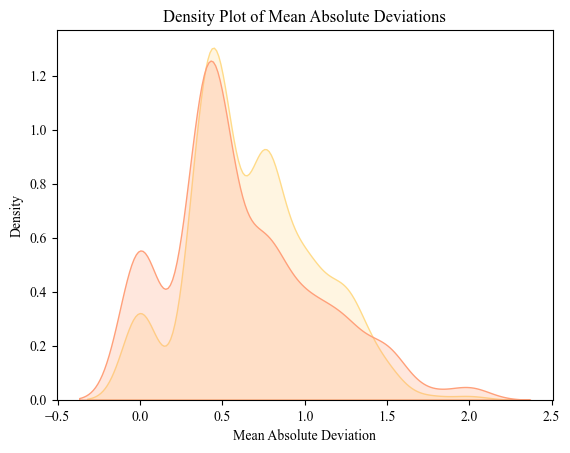

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn用于绘制平滑的密度曲线

def calculate_mean_absolute_deviation(two_dim_array):
    """
    对二维数组中的每个子列表计算平均绝对偏差
    :param two_dim_array: 二维数组
    :return: 含有每个子列表平均绝对偏差的列表
    """
    deviations = []
    for sub_list in two_dim_array:
        mean = np.mean(sub_list)
        deviations.append(np.mean([abs(x - mean) for x in sub_list]))
    return deviations

def plot_density(deviations1, deviations2):
    """
    使用KDE绘制两组数据的平滑密度曲线
    :param deviations1: 第一组数据的平均绝对偏差
    :param deviations2: 第二组数据的平均绝对偏差
    """
    sns.kdeplot(deviations1, color="#FFDB89", fill=True)  # 使用填充色
    sns.kdeplot(deviations2, color='#FFA07A', fill=True)
    plt.title("Density Plot of Mean Absolute Deviations")
    plt.xlabel("Mean Absolute Deviation")
    plt.ylabel("Density")
    plt.show()

# 假设judge1_list和judge2_list是已经定义好的两个二维列表
deviations1 = calculate_mean_absolute_deviation(judge1_list)
deviations2 = calculate_mean_absolute_deviation(judge2_list)
plot_density(deviations1, deviations2)


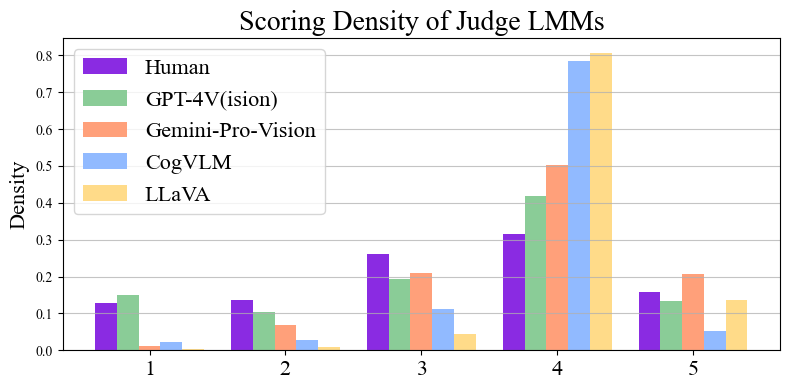

In [30]:

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import font_manager

font_manager.fontManager.addfont('/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/scripts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'


plt.figure(figsize=(8, 4))
colors = ["#8A2BE2", '#8ACC97', '#FFA07A','#91BAFF', '#FFDB89']
# Plotting histograms again
plt.hist([Human_answer2, judge2, judge1, cogvlm_result, llava_result], bins=np.arange(1, 7) - 0.5, density=True, color=colors, label=['Human', 'GPT-4V(ision)', 'Gemini-Pro-Vision', 'CogVLM', 'LLaVA'])

# Adding labels, title, and increasing the legend size even more
# plt.xlabel('Scoring Number', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Scoring Density of Judge LMMs', fontsize=20)
plt.legend(prop={'size': 16})  # Increasing legend size

# Maintaining the improved overall look
plt.xticks(np.arange(1, 6), fontsize=16)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig('density_of_different_judge.pdf')
# Show the plot with the larger legend
plt.show()
llava_result_11 = llava_result
cogvlm_result_11 = cogvlm_result
gpt4_result_11 = judge2
Gemini_result_11 = judge1
human_11 = Human_answer2

In [31]:
import json
items = []
file_path = "/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/human labeling and agreement/fixed_pair_0201.jsonl"
with open(file_path, "r") as f:
    for line in f:
        items.append(json.loads(line))
items[0]
# 数据集定义
dataset = {
    (0, 300): "coco", (300, 600): "Concept Caption", (600, 900): "diffusiondb", 
    (900, 1200): "infographicsVQA", (1200, 1800): "mathvista", (1800, 2100): "textVQA", 
    (2100, 2400): "WIT", (2400, 2700): "ChartQA", (2700, 3000): "VisitBench", 
    (3000, 3300): "LLaVA"
}
judge1_analysis = []
judge2_analysis = []
judge1_agree = 0
judge2_agree = 0
judge1_hallucination = 0
judge2_hallucination = 0
judge1_win = 0
judge2_win = 0
tie = 0
ground_truth = {}
human_answer = []
judge1_answer = []
judge2_answer = []
for item in items:
    if item['human_answer'] != -1 and item['result1']['judge'] != -1 and item['result2']['judge'] != -1: # and item['human_answer'] != 'C' and item['result1']['judge'] != 'C' and item['result2']['judge'] != 'C'
        ground_truth[str(item['id'])+'_'+str(item['pair_id'])] = item['human_answer']
        human_answer.append(item['human_answer'])
        judge1_answer.append(item['result1']['judge'])
        judge2_answer.append(item['result2']['judge'])  
    if item['evaluator1']['judge_human']!= -1 and item['evaluator1']['analysis']!= -1 and item['evaluator1']['hallucination']!= -1:
        judge1_analysis.append(item['evaluator1']['analysis'])
        if item['evaluator1']['judge_human'] == 1:
            judge1_agree += 1
        if item['evaluator1']['hallucination'] == 1:
            judge1_hallucination += 1
    if item['evaluator2']['judge_human']!= -1 and item['evaluator2']['analysis']!= -1 and item['evaluator2']['hallucination']!= -1:
        judge2_analysis.append(item['evaluator2']['analysis'])
        if item['evaluator2']['judge_human'] == 1:
            judge2_agree += 1
        if item['evaluator2']['hallucination'] == 1:
            judge2_hallucination += 1
    if item['comparison'] == 1:
        judge1_win += 1
    elif item['comparison'] == 2:
        judge2_win += 1
    else:
        tie += 1
human_answer222 = human_answer

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
human_answer = {}
for item in items:
    if item['human_answer'] != -1:
        if item['turn'] == 0:
            human_answer[item['pair_id']] = item['human_answer']
        else:
            if item['human_answer'] == 'A':
                human_answer[item['pair_id']] = 'B'
            elif item['human_answer'] == 'B':
                human_answer[item['pair_id']] = 'A'
            else:
                human_answer[item['pair_id']] = 'C'
llava = []
with open("/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/step3/pairwise evaluating data/llava_pair_clean.jsonl",'r') as f:
    for line in f:
        llava.append(json.loads(line))
# 数据集定义
dataset = {
    (0, 300): "coco", (300, 600): "Concept Caption", (600, 900): "diffusiondb", 
    (900, 1200): "infographicsVQA", (1200, 1800): "mathvista", (1800, 2100): "textVQA", 
    (2100, 2400): "WIT", (2400, 2700): "ChartQA", (2700, 3000): "VisitBench", 
    (3000, 3300): "LLaVA"
}
# 初始化数据结构，为每个数据集创建存储结构
metrics_by_dataset = {name: {'llava_judge': [], 'llava_human': []} for _, name in dataset.items()}
llava_result = []
# 对每个条目按数据集分别统计评分
for item in llava:
    if item['result']['judge'] in ['A', 'B', 'C'] and int(item['pair_id']) in human_answer.keys() and human_answer[int(item['pair_id'])] != -1:
        llava_result.append(item['result']['judge'])
        pair_id = item['pair_id']
        dataset_name = None
        # 确定pair_id属于哪个数据集
        for (start, end), name in dataset.items():
            if start <= int(pair_id) < end:
                dataset_name = name
                break

        if dataset_name is None:
            continue

        # 添加评分到对应数据集
        metrics_by_dataset[dataset_name]['llava_judge'].append(item['result']['judge'])
        metrics_by_dataset[dataset_name]['llava_human'].append(human_answer[pair_id])

# 计算并打印每个数据集的指标
sum = 0
for dataset_name, data in metrics_by_dataset.items():
    if data['llava_judge'] and data['llava_human']:
        llava_predictions = [1 if x == 'A' else 2 if x == 'B' else 3 for x in data['llava_judge']]
        num_ground_truth = [1 if x == 'A' else 2 if x == 'B' else 3 for x in data['llava_human']]

        # 计算指标
        accuracy = accuracy_score(num_ground_truth, llava_predictions)
        sum += accuracy
        recall = recall_score(num_ground_truth, llava_predictions, average='macro')
        precision = precision_score(num_ground_truth, llava_predictions, average='macro')
        f1 = f1_score(num_ground_truth, llava_predictions, average='macro')

        print(f"{dataset_name} - Accuracy: {accuracy:.3f}, Recall: {recall:.3f}, Precision: {precision:.3f}, F1 Score: {f1:.3f}")
    else:
        print(f"{dataset_name} - No data for metrics calculation")
print(sum/10)

coco - Accuracy: 0.273, Recall: 0.300, Precision: 0.294, F1 Score: 0.193
Concept Caption - Accuracy: 0.478, Recall: 0.362, Precision: 0.358, F1 Score: 0.285
diffusiondb - Accuracy: 0.286, Recall: 0.333, Precision: 0.097, F1 Score: 0.150
infographicsVQA - Accuracy: 0.273, Recall: 0.294, Precision: 0.094, F1 Score: 0.143
mathvista - Accuracy: 0.657, Recall: 0.377, Precision: 0.413, F1 Score: 0.372
textVQA - Accuracy: 0.510, Recall: 0.348, Precision: 0.248, F1 Score: 0.271
WIT - Accuracy: 0.369, Recall: 0.324, Precision: 0.199, F1 Score: 0.238
ChartQA - Accuracy: 0.383, Recall: 0.328, Precision: 0.208, F1 Score: 0.245
VisitBench - Accuracy: 0.456, Recall: 0.346, Precision: 0.377, F1 Score: 0.263
LLaVA - Accuracy: 0.484, Recall: 0.405, Precision: 0.577, F1 Score: 0.363
0.4168078348038506


/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1468: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1468: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
human_answer = {}
for item in items:
    if item['human_answer'] != -1:
        if item['turn'] == 0:
            human_answer[item['pair_id']] = item['human_answer']
        else:
            if item['human_answer'] == 'A':
                human_answer[item['pair_id']] = 'B'
            elif item['human_answer'] == 'B':
                human_answer[item['pair_id']] = 'A'
            else:
                human_answer[item['pair_id']] = 'C'
llava = []
with open("/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/step3/pairwise evaluating data/CogVLM_pair_clean.jsonl",'r') as f:
    for line in f:
        llava.append(json.loads(line))
# 数据集定义
dataset = {
    (0, 300): "coco", (300, 600): "Concept Caption", (600, 900): "diffusiondb", 
    (900, 1200): "infographicsVQA", (1200, 1800): "mathvista", (1800, 2100): "textVQA", 
    (2100, 2400): "WIT", (2400, 2700): "ChartQA", (2700, 3000): "VisitBench", 
    (3000, 3300): "LLaVA"
}
# 初始化数据结构，为每个数据集创建存储结构
metrics_by_dataset = {name: {'llava_judge': [], 'llava_human': []} for _, name in dataset.items()}
cogvlm_result = []
# 对每个条目按数据集分别统计评分
for item in llava:
    if item['result']['judge'] in ['A', 'B', 'C'] and int(item['pair_id']) in human_answer.keys() and human_answer[int(item['pair_id'])] != -1:
        cogvlm_result.append(item['result']['judge'])
        pair_id = item['pair_id']
        dataset_name = None
        # 确定pair_id属于哪个数据集
        for (start, end), name in dataset.items():
            if start <= int(pair_id) < end:
                dataset_name = name
                break

        if dataset_name is None:
            continue

        # 添加评分到对应数据集
        metrics_by_dataset[dataset_name]['llava_judge'].append(item['result']['judge'])
        metrics_by_dataset[dataset_name]['llava_human'].append(human_answer[pair_id])
sum = 0
# 计算并打印每个数据集的指标
for dataset_name, data in metrics_by_dataset.items():
    if data['llava_judge'] and data['llava_human']:
        llava_predictions = [1 if x == 'A' else 2 if x == 'B' else 3 for x in data['llava_judge']]
        num_ground_truth = [1 if x == 'A' else 2 if x == 'B' else 3 for x in data['llava_human']]
        print(len(data['llava_judge']))
        # 计算指标
        accuracy = accuracy_score(num_ground_truth, llava_predictions)
        sum += accuracy
        recall = recall_score(num_ground_truth, llava_predictions, average='macro')
        precision = precision_score(num_ground_truth, llava_predictions, average='macro')
        f1 = f1_score(num_ground_truth, llava_predictions, average='macro')

        print(f"{dataset_name} - Accuracy: {accuracy:.3f}, Recall: {recall:.3f}, Precision: {precision:.3f}, F1 Score: {f1:.3f}")
    else:
        print(f"{dataset_name} - No data for metrics calculation")
print(f"{sum/10:.3f}")

62
coco - Accuracy: 0.548, Recall: 0.328, Precision: 0.272, F1 Score: 0.293
44
Concept Caption - Accuracy: 0.409, Recall: 0.273, Precision: 0.154, F1 Score: 0.197
32
diffusiondb - Accuracy: 0.562, Recall: 0.307, Precision: 0.301, F1 Score: 0.292
31
infographicsVQA - Accuracy: 0.613, Recall: 0.370, Precision: 0.533, F1 Score: 0.317
182
mathvista - Accuracy: 0.412, Recall: 0.345, Precision: 0.313, F1 Score: 0.277
32
textVQA - Accuracy: 0.250, Recall: 0.421, Precision: 0.397, F1 Score: 0.237
22
WIT - Accuracy: 0.273, Recall: 0.375, Precision: 0.254, F1 Score: 0.206
42
ChartQA - Accuracy: 0.262, Recall: 0.343, Precision: 0.219, F1 Score: 0.218
37
VisitBench - Accuracy: 0.324, Recall: 0.392, Precision: 0.405, F1 Score: 0.281
30
LLaVA - Accuracy: 0.433, Recall: 0.310, Precision: 0.149, F1 Score: 0.202
0.409


/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1468: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1468: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cdp/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1468: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cdp/anaconda3/envs/torch/lib/python3.9/s

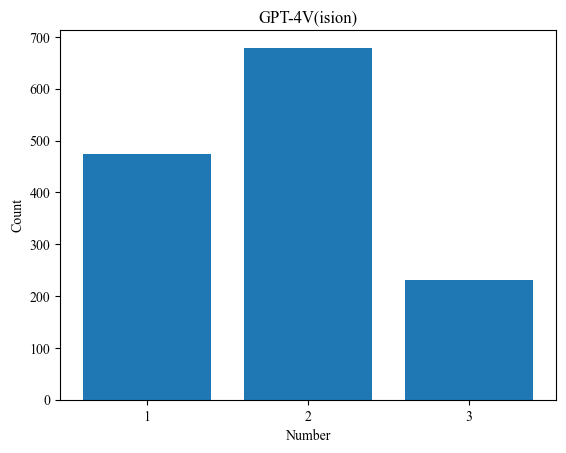

In [34]:
human_answer222 = [1 if x == 'A' else 2 if x == 'B' else 3 for x in human_answer222]
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(human_answer222)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 4)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('GPT-4V(ision)')
plt.show()

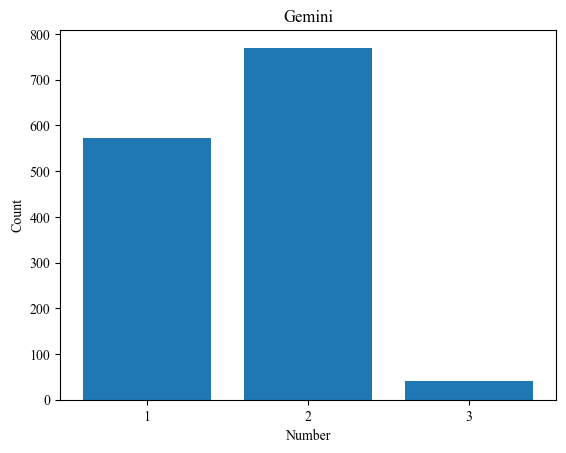

In [35]:
judge1_answer = [1 if x == 'A' else 2 if x == 'B' else 3 for x in judge1_answer]
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(judge1_answer)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 4)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Gemini')
plt.show()

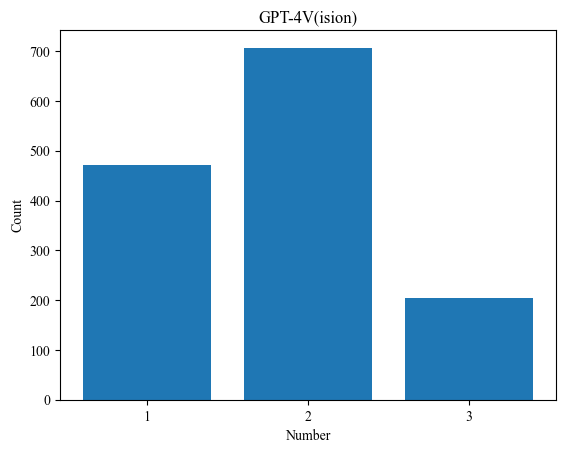

In [36]:
judge2_answer = [1 if x == 'A' else 2 if x == 'B' else 3 for x in judge2_answer]
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(judge2_answer)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 4)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('GPT-4V(ision)')
plt.show()

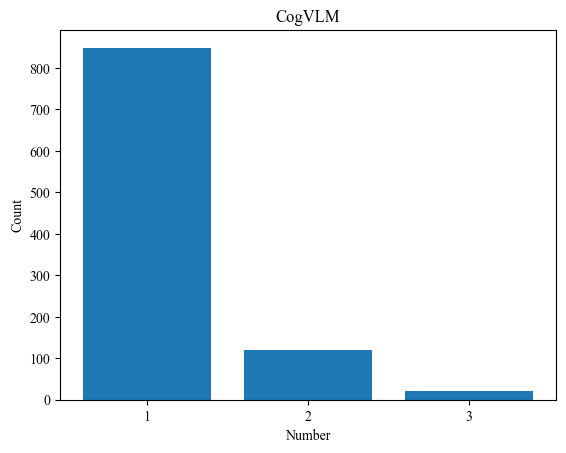

In [37]:
cogVLM_answer = [1 if x == 'A' else 2 if x == 'B' else 3 for x in cogvlm_result]
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(cogVLM_answer)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 4)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('CogVLM')
plt.show()

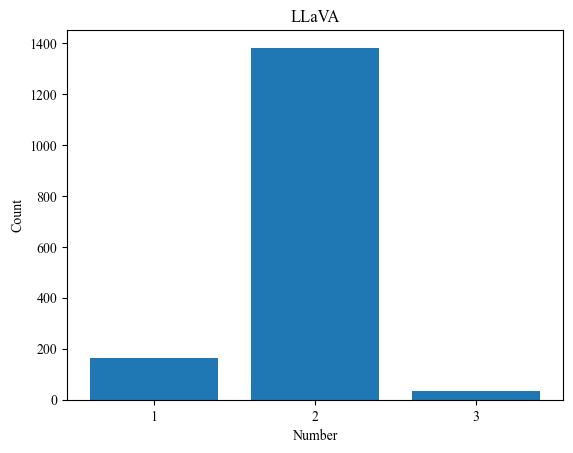

In [38]:
llava_answer = [1 if x == 'A' else 2 if x == 'B' else 3 for x in llava_result]
import numpy as np
import matplotlib.pyplot as plt


# 计算每个数字的出现次数
counts = np.bincount(llava_answer)[1:]  # np.bincount从1开始计数，因此去掉索引0的计数

# 绘制条形图
numbers = np.arange(1, 4)  # 数字1到5
plt.bar(numbers, counts, tick_label=numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('LLaVA')
plt.show()

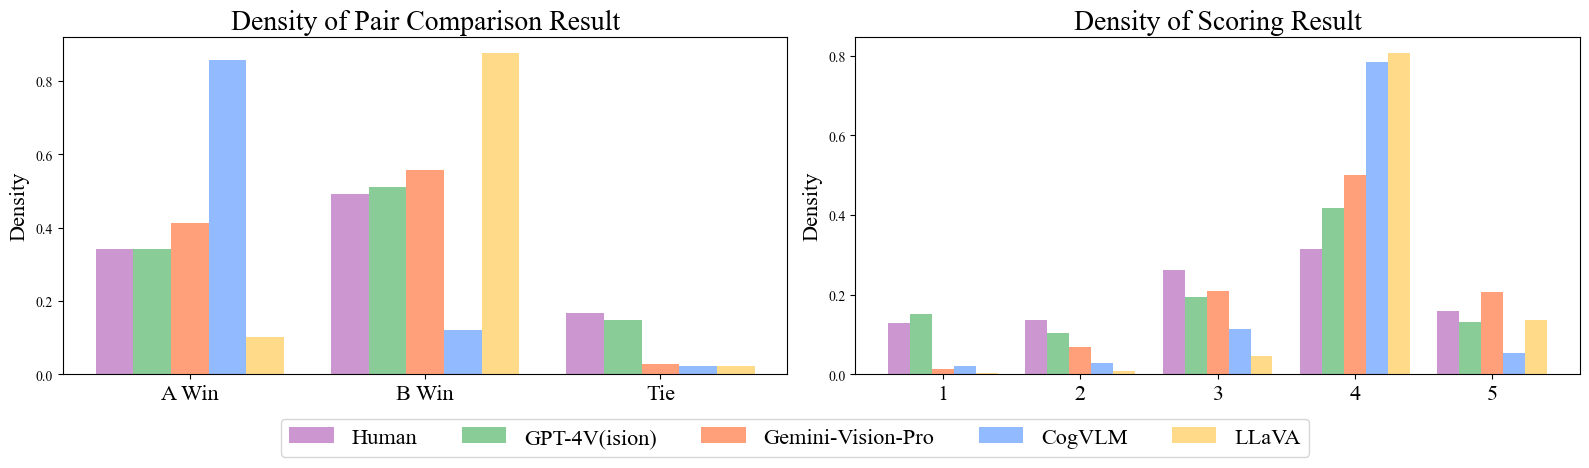

In [41]:
# Re-importing necessary libraries and redefining the combined code with subplots and a shared legend

import matplotlib.pyplot as plt
import numpy as np

# For demonstration purposes, creating example arrays

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
colors = ["#cc96d1", '#8ACC97', '#FFA07A','#91BAFF', '#FFDB89']

# First subplot
ax1.hist([human_answer222, judge2_answer, judge1_answer, cogVLM_answer, llava_answer], bins=np.arange(1, 5) - 0.5, density=True, color=colors)
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(['A Win', 'B Win', 'Tie'], fontsize=16)
ax1.set_ylabel('Density', fontsize=16)
ax1.set_title('Density of Pair Comparison Result', fontsize=20)
ax1.grid(False) 
# Second subplot
ax2.hist([human_11, gpt4_result_11, Gemini_result_11, cogvlm_result_11, llava_result_11], bins=np.arange(1, 7) - 0.5, density=True, color=colors)
ax2.set_xticks(np.arange(1, 6))
ax2.set_xticklabels(['1', '2', '3', '4', '5'], fontsize=16)
ax2.set_ylabel('Density', fontsize=16)
ax2.set_yticks([0.0,0.2,0.4,0.6,0.8])
ax2.set_title('Density of Scoring Result', fontsize=20)
ax2.grid(False) 
# Creating a shared legend for both subplots
labels = ['Human', 'GPT-4V(ision)', 'Gemini-Vision-Pro', 'CogVLM', 'LLaVA']
fig.legend(labels, loc='lower center', ncol=5, fontsize=16)

# Adjusting layout to accommodate legend
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Saving and showing the plot
plt.savefig('combined.pdf')
plt.show()


In [67]:
import json
items = []
# 读取文件
with open('/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/human labeling and agreement/score_setting_0201.jsonl', 'r') as f:
    for line in f:
        items.append(json.loads(line))

gpt_win = 0
gemini_win = 0
tie = 0
for item in items:
    if 'comparison' not in item.keys() or item['comparison'] == -1:
        continue
    if item['comparison'] == 0:
        gemini_win += 1
    if item['comparison'] == 1:
        gpt_win += 1
    if item['comparison'] == 2:
        tie += 1
print(gemini_win/(gemini_win+gpt_win+tie))
print(gpt_win/(gemini_win+gpt_win+tie))
print(tie/(gemini_win+gpt_win+tie))

0.06806282722513089
0.2914485165794066
0.6404886561954625


In [68]:
import json

# 数据集定义
dataset = {
    (0, 300): "coco", (300, 600): "Concept Caption", (600, 900): "diffusiondb", 
    (900, 1200): "infographicsVQA", (1200, 1800): "mathvista", (1800, 2100): "textVQA", 
    (2100, 2400): "WIT", (2400, 2700): "ChartQA", (2700, 3000): "VisitBench", 
    (3000, 3300): "LLaVA"
}

# 初始化数据结构
items = []
# 读取文件
with open('/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/human labeling and agreement/score_setting_0201.jsonl', 'r') as f:
    for line in f:
        items.append(json.loads(line))
oral_items = []
with open('/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/step3/score evaluating data/score_evaluation.jsonl', 'r') as f:
    for line in f:
        oral_items.append(json.loads(line))

oral_dict = {}
for item in oral_items:
    oral_dict[item['id']] = item
    
judge1 = {1:[], 2:[], 3:[], 4:[], 5:[]} 
judge2 = {1:[], 2:[], 3:[], 4:[], 5:[]}
for item in items:
    if str(item['response1']['Evaluator1']['judge_Evaluator']) in "12345":
        judge1[int(item['response1']['Evaluator1']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][0]['answer'].split()))
    if str(item['response1']['Evaluator2']['judge_Evaluator']) in "12345":
        judge2[int(item['response1']['Evaluator2']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][0]['answer'].split()))
    if str(item['response2']['Evaluator1']['judge_Evaluator']) in "12345":
        judge1[int(item['response2']['Evaluator1']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][1]['answer'].split()))
    if str(item['response2']['Evaluator2']['judge_Evaluator']) in "12345":
        judge2[int(item['response2']['Evaluator2']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][1]['answer'].split()))
    if str(item['response3']['Evaluator1']['judge_Evaluator']) in "12345":
        judge1[int(item['response3']['Evaluator1']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][2]['answer'].split()))
    if str(item['response3']['Evaluator2']['judge_Evaluator']) in "12345":
        judge2[int(item['response3']['Evaluator2']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][2]['answer'].split()))
    if str(item['response4']['Evaluator1']['judge_Evaluator']) in "12345":
        judge1[int(item['response4']['Evaluator1']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][3]['answer'].split()))
    if str(item['response4']['Evaluator2']['judge_Evaluator']) in "12345":
        judge2[int(item['response4']['Evaluator2']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][3]['answer'].split()))
        

In [69]:
import json

# 数据集定义
dataset = {
    (0, 300): "coco", (300, 600): "Concept Caption", (600, 900): "diffusiondb", 
    (900, 1200): "infographicsVQA", (1200, 1800): "mathvista", (1800, 2100): "textVQA", 
    (2100, 2400): "WIT", (2400, 2700): "ChartQA", (2700, 3000): "VisitBench", 
    (3000, 3300): "LLaVA"
}

# 初始化数据结构
items = []
# 读取文件
with open('/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/human labeling and agreement/score_setting_0201.jsonl', 'r') as f:
    for line in f:
        items.append(json.loads(line))
oral_items = []
with open('/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/step3/score evaluating data/score_evaluation.jsonl', 'r') as f:
    for line in f:
        oral_items.append(json.loads(line))

oral_dict = {}
for item in oral_items:
    oral_dict[item['id']] = item
    
judge1_len = {1:[], 2:[], 3:[], 4:[], 5:[]} 
judge2_len = {1:[], 2:[], 3:[], 4:[], 5:[]}
for item in items:
    if str(item['response1']['Evaluator1']['judge_Evaluator']) in "12345":
        judge1_len[int(item['response1']['Evaluator1']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][0]['answer']))
    if str(item['response1']['Evaluator2']['judge_Evaluator']) in "12345":
        judge2_len[int(item['response1']['Evaluator2']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][0]['answer']))
    if str(item['response2']['Evaluator1']['judge_Evaluator']) in "12345":
        judge1_len[int(item['response2']['Evaluator1']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][1]['answer']))
    if str(item['response2']['Evaluator2']['judge_Evaluator']) in "12345":
        judge2_len[int(item['response2']['Evaluator2']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][1]['answer']))
    if str(item['response3']['Evaluator1']['judge_Evaluator']) in "12345":
        judge1_len[int(item['response3']['Evaluator1']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][2]['answer']))
    if str(item['response3']['Evaluator2']['judge_Evaluator']) in "12345":
        judge2_len[int(item['response3']['Evaluator2']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][2]['answer']))
    if str(item['response4']['Evaluator1']['judge_Evaluator']) in "12345":
        judge1_len[int(item['response4']['Evaluator1']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][3]['answer']))
    if str(item['response4']['Evaluator2']['judge_Evaluator']) in "12345":
        judge2_len[int(item['response4']['Evaluator2']['judge_Evaluator'])].append(len(oral_dict[int(item['id'])]['answers'][3]['answer']))
        

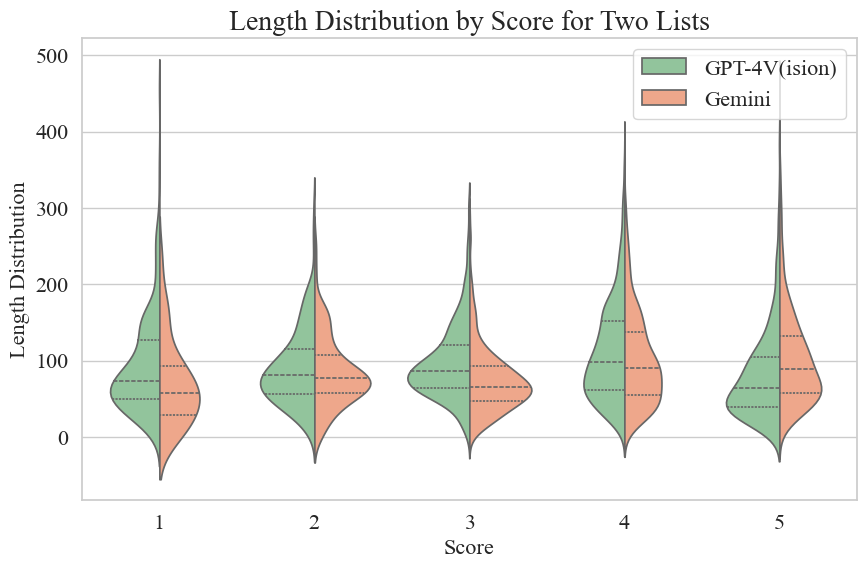

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import font_manager

font_manager.fontManager.addfont('/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/scripts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'
# 生成模拟数据
np.random.seed(0)  # 确保每次运行时数据相同
data1 = judge1.values()
data2 = judge2.values()

# 重新处理数据，确保每个评分和长度对应到正确的列表类型
data = []
for score, lengths1, lengths2 in zip(range(1, 6), data2, data1):
    for length in lengths1:
        data.append({'Score': score, 'Length': length, 'List Type': 'GPT-4V(ision)'})
    for length in lengths2:
        data.append({'Score': score, 'Length': length, 'List Type': 'Gemini'})

# 再次创建DataFrame
df = pd.DataFrame(data)
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'

# 重新绘制violin图，使用新的颜色和字体大小
plt.figure(figsize=(10, 6))
sns.violinplot(x='Score', y='Length', hue='List Type', data=df, split=True, inner='quartile',
               palette=['#8ACC97', '#FFA07A'])
plt.title('Length Distribution by Score for Two Lists', fontsize=20)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Length Distribution', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置legend
plt.legend(fontsize=16)

plt.show()


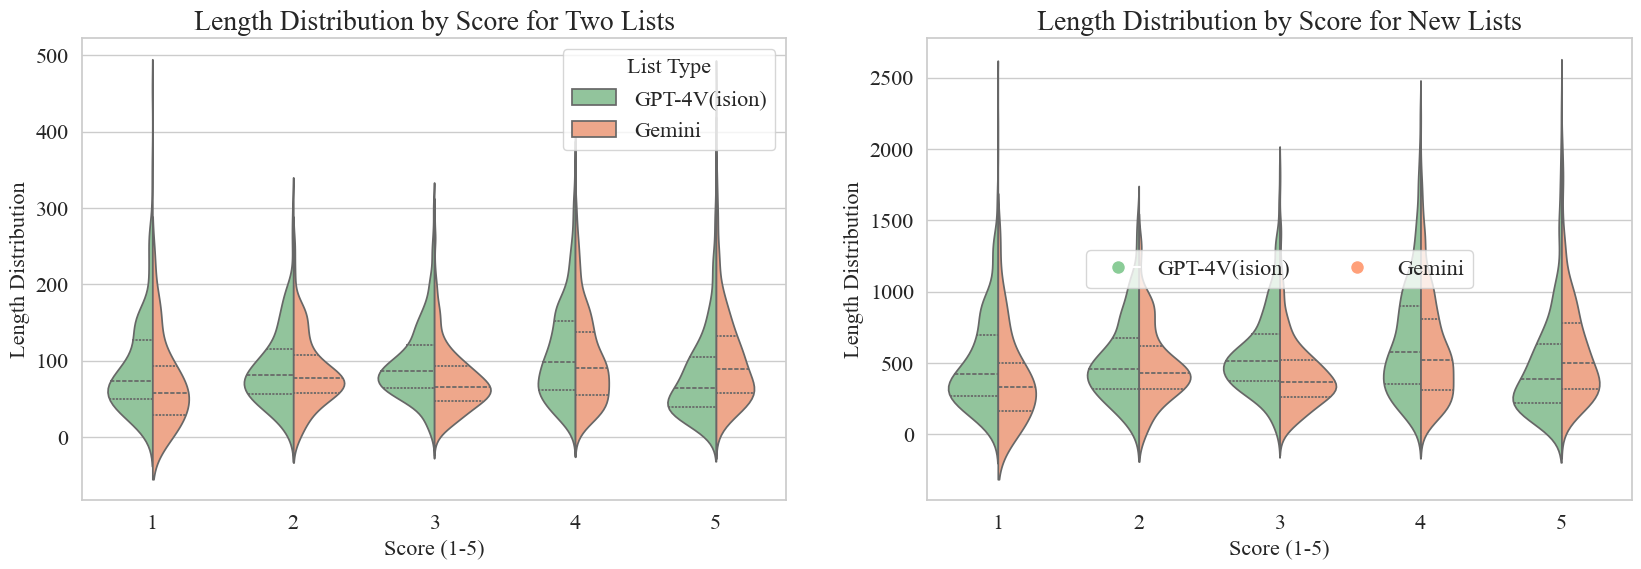

In [71]:
# 创建一个包含两个子图的大图
plt.figure(figsize=(20, 6))

# 第一个子图
plt.subplot(1, 2, 1)  # 行数，列数，子图编号
sns.violinplot(x='Score', y='Length', hue='List Type', data=df, split=True, inner='quartile',
               palette=['#8ACC97', '#FFA07A'])
plt.title('Length Distribution by Score for Two Lists', fontsize=20)
plt.xlabel('Score (1-5)', fontsize=16)
plt.ylabel('Length Distribution', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='List Type', fontsize=16, title_fontsize=16)

# 生成另一组模拟数据
data3 = judge1_len.values()
data4 = judge2_len.values()

# 处理新数据
new_data = []
for score, lengths3, lengths4 in zip(range(1, 6), data4, data3):
    for length in lengths3:
        new_data.append({'Score': score, 'Length': length, 'List Type': 'List 3'})
    for length in lengths4:
        new_data.append({'Score': score, 'Length': length, 'List Type': 'List 4'})

new_df = pd.DataFrame(new_data)

# 第二个子图
plt.subplot(1, 2, 2)  # 行数，列数，子图编号
sns.violinplot(x='Score', y='Length', hue='List Type', data=new_df, split=True, inner='quartile',
               palette=['#8ACC97', '#FFA07A'])
plt.title('Length Distribution by Score for New Lists', fontsize=20)
plt.xlabel('Score (1-5)', fontsize=16)
plt.ylabel('Length Distribution', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

legend_labels = ['GPT-4V(ision)', 'Gemini']  # 图例标签
legend_colors = ['#8ACC97', '#FFA07A']  # 对应的颜色

handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
plt.legend(handles=handles, loc='center', ncol=2, fontsize=16, title_fontsize=16)


plt.show()


In [74]:
import json
items = []
file_path = "/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/human labeling and agreement/fixed_pair_0201.jsonl"
with open(file_path, "r") as f:
    for line in f:
        items.append(json.loads(line))
items[0]
# 数据集定义
dataset = {
    (0, 300): "coco", (300, 600): "Concept Caption", (600, 900): "diffusiondb", 
    (900, 1200): "infographicsVQA", (1200, 1800): "mathvista", (1800, 2100): "textVQA", 
    (2100, 2400): "WIT", (2400, 2700): "ChartQA", (2700, 3000): "VisitBench", 
    (3000, 3300): "LLaVA"
}
pair_judge1 = {1:[], 2:[], 3:[]}
pair_judge2 = {1:[], 2:[], 3:[]}
for item in items:
    if item['human_answer'] != -1 and item['result1']['judge'] != -1: # and item['human_answer'] != 'C' and item['result1']['judge'] != 'C' and item['result2']['judge'] != 'C'
        if item['result1']['judge'] == 'A':
            pair_judge1[1].append(len(item['answer1']['answer'].split()))
        elif item['result1']['judge'] == 'B':
            pair_judge1[2].append(len(item['answer2']['answer'].split()))
        else:
            pair_judge1[3].append(len(item['answer1']['answer'].split()))
            pair_judge1[3].append(len(item['answer2']['answer'].split()))
    if item['human_answer'] != -1 and item['result2']['judge'] != -1: 
        if item['result2']['judge'] == 'A':
            pair_judge2[1].append(len(item['answer1']['answer'].split()))
        elif item['result2']['judge'] == 'B':
            pair_judge2[2].append(len(item['answer2']['answer'].split()))
        else:
            pair_judge2[3].append(len(item['answer1']['answer'].split()))
            pair_judge2[3].append(len(item['answer2']['answer'].split()))
    


ValueError: Could not interpret value `Preference` for `x`. An entry with this name does not appear in `data`.

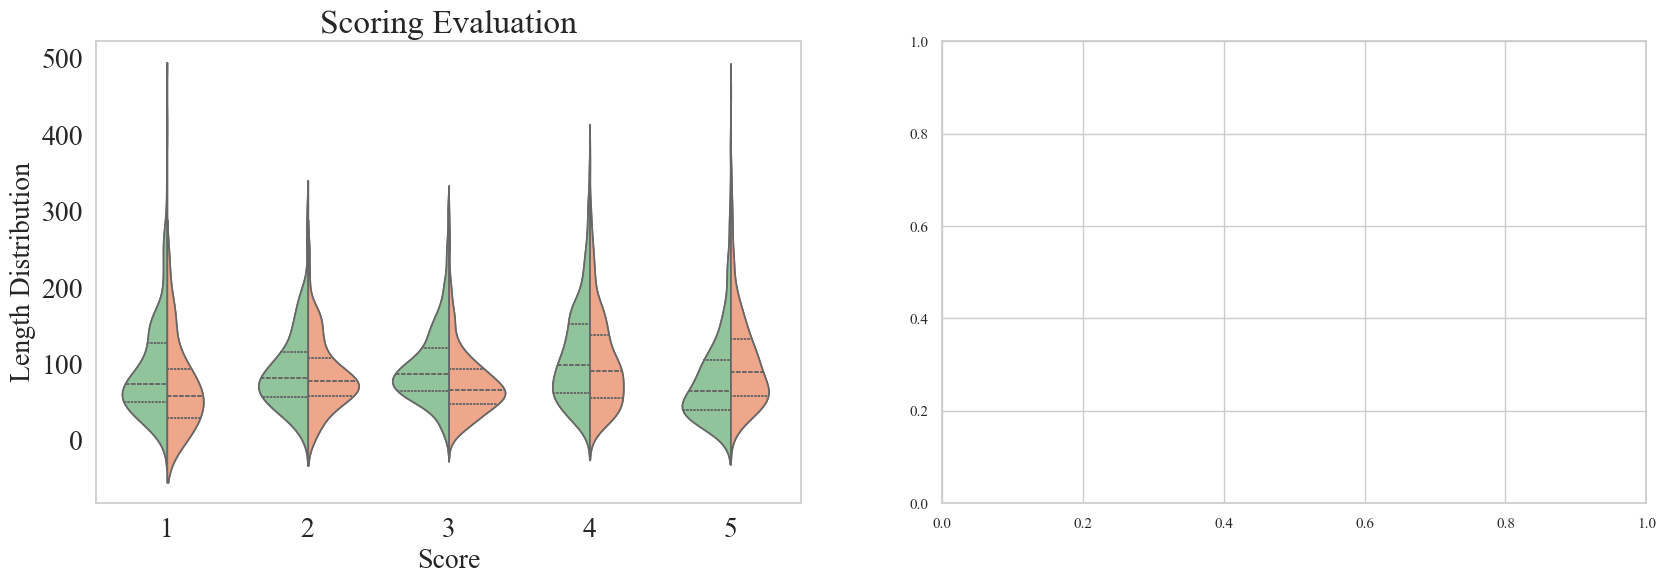

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import font_manager

# 设置字体
font_manager.fontManager.addfont('/media/ssd/cdp/LMM-as-a-Judge/lmm_judge_dataset/scripts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'

# 生成模拟数据
np.random.seed(0)  # 确保每次运行时数据相同
data1 = judge1.values()
data2 = judge2.values()

# 重新处理数据，确保每个评分和长度对应到正确的列表类型
data = []
for score, lengths1, lengths2 in zip(range(1, 6), data2, data1):
    for length in lengths1:
        data.append({'Score': score, 'Length': length, 'List Type': 'GPT-4V(ision)'})
    for length in lengths2:
        data.append({'Score': score, 'Length': length, 'List Type': 'Gemini'})

df = pd.DataFrame(data)

# 创建一个包含两个子图的大图
plt.figure(figsize=(20, 6))

# 第一个子图
plt.subplot(1, 2, 1)  # 行数，列数，子图编号
sns.violinplot(x='Score', y='Length', hue='List Type', data=df, split=True, inner='quartile',
               palette=['#8ACC97', '#FFA07A'], legend=False)
plt.title('Scoring Evaluation', fontsize=24)
plt.xlabel('Score', fontsize=20)
plt.ylabel('Length Distribution', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# 生成另一组模拟数据
data3 = pair_judge1.values()
data4 = pair_judge2.values()

# 第一个子图
ax1 = plt.subplot(1, 2, 1)  # 获取第一个子图的 ax 对象
sns.violinplot(x='Score', y='Length', hue='List Type', data=df, split=True, inner='quartile',
               palette=['#8ACC97', '#FFA07A'], legend=False)
ax1.set_title('Scoring Evaluation', fontsize=24)
ax1.set_xlabel('Score', fontsize=20)
ax1.set_ylabel('Length Distribution', fontsize=20)
ax1.tick_params(labelsize=20)
ax1.grid(False)  # 去掉网格线

new_data = []
for score, lengths1, lengths2 in zip(range(1, 6), data2, data1):
    for length in lengths1:
        data.append({'Preference': score, 'Length': length, 'List Type': 'GPT-4V(ision)'})
    for length in lengths2:
        data.append({'Preference': score, 'Length': length, 'List Type': 'Gemini'})
new_df = pd.DataFrame(new_data)

# 第二个子图
ax2 = plt.subplot(1, 2, 2)  # 获取第二个子图的 ax 对象
sns.violinplot(x='Preference', y='Length', hue='List Type', data=new_df, split=True, inner='quartile',
               palette=['#8ACC97', '#FFA07A'], width=.6, legend=False)
ax2.set_title('Pair Comparison', fontsize=24)
ax2.set_xlabel('Preference', fontsize=20)
ax2.set_ylabel('Length Distribution', fontsize=20)
ax2.tick_params(labelsize=20)
ax2.grid(False)  # 去掉网格线

# 在整个图的下方添加统一的图例
legend_labels = ['GPT-4V(ision)', 'Gemini']  # 图例标签
legend_colors = ['#8ACC97', '#FFA07A']  # 对应的颜色

handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=15) for label, color in zip(legend_labels, legend_colors)]
plt.figlegend(handles=handles, loc=[0.4, 0], ncol=2, fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 调整布局以适应图例
plt.savefig("length_bias_score_pair.pdf")
plt.show()
